# ABOUT THE NOTEBOOK

The objective of this Notebook is to build a classification model that classifies the side effect of a drug, 
according to their age and various other features like gender, race of different patients.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing Dependancies and Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
def printmd(string):
    display(Markdown(string))

import warnings
warnings.filterwarnings('ignore') 

#### Loading the Drug side effect Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DRUG INTERNSHIP.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,DrugId,Drug,Gender,Age,Condition,Race,Date,Rating,Side effect,UsefulCount
0,146724,25dph-7.5peh,M,41,Stuffy Nose,asian,9/21/2014,3,Mild Side Effects,0
1,146724,25dph-7.5peh,M,49,Cold Symptoms,asian,1/13/2011,1,Severe Side Effects,1
2,144731,warfarin (bulk) 100 % powder,M,37,Other,african american,7/16/2012,5,No Side Effects,0
3,144731,warfarin (bulk) 100 % powder,M,33,Other,american indian,9/23/2010,5,No Side Effects,0
4,144731,warfarin (bulk) 100 % powder,M,27,Other,native hawaiian,1/6/2009,3,Mild Side Effects,1


In [ ]:
df.tail()

,DrugId,Drug,Gender,Age,Condition,Race,Date,Rating,Side effect,UsefulCount
362801,144470,chantix,M,41,Stop Smoking,american indian,11/14/2008,5,No Side Effects,2
362802,144470,chantix,M,42,Other,native hawaiian,11/14/2008,5,No Side Effects,16
362803,144470,chantix,M,43,Stop Smoking,white,11/13/2008,5,No Side Effects,3
362804,144470,chantix,M,44,Stop Smoking,white,11/13/2008,5,No Side Effects,1
362805,144470,chantix,M,45,Stop Smoking,asian,11/12/2008,5,No Side Effects,3


### Understanding the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   DrugId       362806 non-null  int64 
 1   Drug         362806 non-null  object
 2   Gender       362806 non-null  object
 3   Age          362806 non-null  int64 
 4   Condition    362806 non-null  object
 5   Race         362806 non-null  object
 6   Date         362806 non-null  object
 7   Rating       362806 non-null  int64 
 8   Side effect  362806 non-null  object
 9   UsefulCount  362806 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 27.7+ MB


In [ ]:
df.shape

(362806, 10)

In [ ]:
df.isnull().sum()

DrugId         0
Drug           0
Gender         0
Age            0
Condition      0
Race           0
Date           0
Rating         0
Side effect    0
UsefulCount    0
dtype: int64

In [ ]:
df.head()

,DrugId,Drug,Gender,Age,Condition,Race,Date,Rating,Side effect,UsefulCount
0,146724,25dph-7.5peh,M,41,Stuffy Nose,asian,9/21/2014,3,Mild Side Effects,0
1,146724,25dph-7.5peh,M,49,Cold Symptoms,asian,1/13/2011,1,Severe Side Effects,1
2,144731,warfarin (bulk) 100 % powder,M,37,Other,african american,7/16/2012,5,No Side Effects,0
3,144731,warfarin (bulk) 100 % powder,M,33,Other,american indian,9/23/2010,5,No Side Effects,0
4,144731,warfarin (bulk) 100 % powder,M,27,Other,native hawaiian,1/6/2009,3,Mild Side Effects,1


In [ ]:
#code snippet to enlist all the relevant attributes 
count = 0
for i in df.columns:
    print("{}.{}".format(count+1,i))
    count +=1

1.DrugId
2.Drug
3.Gender
4.Age
5.Condition
6.Race
7.Date
8.Rating
9.Side effect
10.UsefulCount


### About the dataset

In [ ]:
def data_info(df):
    print('Number of Columns in the dataset: ',df.shape[1])
    print('Number of rows in the dataset: ',df.shape[0])
    print('Total number of datapoints in the dataset:',df.size)
    numerical_features = [f for f in df.columns if df[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in df.columns if df[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(df)

Number of Columns in the dataset:  10
Number of rows in the dataset:  362806
Total number of datapoints in the dataset: 3628060
Count of Numerical Features: 4
Count of Categorical Features: 6


## Data Preprocessing

### Statistical details

In [ ]:
df.describe()

,DrugId,Age,Rating,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,37.261597,2.672420,6.744916
std,52624.412971,9.733813,1.757915,9.324240
min,1.000000,18.000000,1.000000,0.000000
25%,4896.000000,30.000000,1.000000,1.000000
50%,9548.000000,36.000000,3.000000,4.000000
75%,63522.000000,43.000000,5.000000,9.000000
max,178546.000000,82.000000,5.000000,255.000000


In [ ]:
df.describe(include='all')

,DrugId,Drug,Gender,Age,Condition,Race,Date,Rating,Side effect,UsefulCount
count,362806.000000,362806,362806,362806.000000,362806,362806,362806,362806.000000,362806,362806.000000
unique,NaN,7093,2,NaN,1806,5,4524,NaN,3,NaN
top,NaN,cymbalta,F,NaN,Other,asian,10/29/2007,NaN,Severe Side Effects,NaN
freq,NaN,4648,198728,NaN,49765,96111,404,NaN,173803,NaN
mean,36879.370774,NaN,NaN,37.261597,NaN,NaN,NaN,2.672420,NaN,6.744916
std,52624.412971,NaN,NaN,9.733813,NaN,NaN,NaN,1.757915,NaN,9.324240
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,4896.000000,NaN,NaN,30.000000,NaN,NaN,NaN,1.000000,NaN,1.000000
50%,9548.000000,NaN,NaN,36.000000,NaN,NaN,NaN,3.000000,NaN,4.000000
75%,63522.000000,NaN,NaN,43.000000,NaN,NaN,NaN,5.000000,NaN,9.000000


In [ ]:
df.nunique()

DrugId         6572
Drug           7093
Gender            2
Age              65
Condition      1806
Race              5
Date           4524
Rating            3
Side effect       3
UsefulCount     148
dtype: int64

In [ ]:
group_names = df['Side effect'].unique().tolist()
group_names

['Mild Side Effects', 'Severe Side Effects', 'No Side Effects']

In [ ]:
df.dtypes

DrugId          int64
Drug           object
Gender         object
Age             int64
Condition      object
Race           object
Date           object
Rating          int64
Side effect    object
UsefulCount     int64
dtype: object

In [ ]:
def unique_checker(df):
    """loops and prints unique values in each column"""
    for col in df.columns:
        print("Unique values in {} feature.".format(col))
        print(df[col].unique(),"\n")
        print("*"*40)

In [ ]:
unique_checker(df) #scroll / toggle output to view all outputs

# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Unique values in DrugId feature.
[146724 144731 163180 ...  94947 144470 163265] 

****************************************
Unique values in Drug feature.
['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest congestion relief dm' 'chantix' 'chateal'] 

****************************************
Unique values in Gender feature.
['M' 'F'] 

****************************************
Unique values in Age feature.
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82] 

****************************************
Unique values in Condition feature.
['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance'] 

****************************************
Unique values in Race feature.
['asian' 'african american' 'american indian' 'native hawaiian' 'white'] 

**

In [ ]:
def count_checker(df):
    """count of each value under each feature in the data"""
    for col in df.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(df[col].value_counts(),"\n")
        print("*"*40)

In [ ]:
count_checker(df) #scroll / toggle output to view all outputs
# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Count for each category of values in DrugId feature.
6873      8538
1025      7868
6007      7728
4398      5864
14208     5451
          ... 
4118         1
165948       1
54215        1
154021       1
149247       1
Name: DrugId, Length: 6572, dtype: int64 

****************************************
Count for each category of values in Drug feature.
cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64 

****************************************
Count for each category of values in Gender feature.
F    198728
M    164078
Name

### Findings

The dataset contains 362806 entries with a total of 10 columns representing different attributes of the people. Here’s the list;
* Age: Discrete 
* Sex: Nominal (2 categories)
* Race: Nominal (5 categories)
* Side effect: Nominal (3 categories - No side effect, Mild side effect, Severe side effect)  
* Condition: Patients medical condtition(Categorical feature)
* Rating : Drug rating by each patients (Discrete)
* UsefulCount : : Count of patients who feel useful to drug (Discrete)
* Drug : Drug name (Categorical feature)
* DrugId : Id of each drug
* Date : Date of patients review entry.

In [ ]:
#creating a Dataframe from the given dataset
dc = pd.DataFrame(df)
dc.columns

Index(['DrugId', 'Drug', 'Gender', 'Age', 'Condition', 'Race', 'Date',
       'Rating', 'Side effect', 'UsefulCount'],
      dtype='object')

## Data Cleaning

### 1. Missing Value

In [ ]:
 #check the missing value
dc.isnull().sum()

DrugId         0
Drug           0
Gender         0
Age            0
Condition      0
Race           0
Date           0
Rating         0
Side effect    0
UsefulCount    0
dtype: int64

**Above sum shows there are no null values in the dataset.**

### 2. Remove duplicate data

In [ ]:
#Checking for duplicated entries
sum(dc.duplicated(dc.columns))

52

In [ ]:
#Delete the duplicates and check that it worked
dc = dc.drop_duplicates(dc.columns, keep='last')
sum(dc.duplicated(dc.columns))

0

In [ ]:
dc.shape

(362754, 10)

In [ ]:
dc.columns

Index(['DrugId', 'Drug', 'Gender', 'Age', 'Condition', 'Race', 'Date',
       'Rating', 'Side effect', 'UsefulCount'],
      dtype='object')

### 3. Handling Outliers

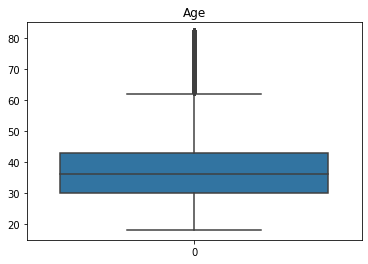

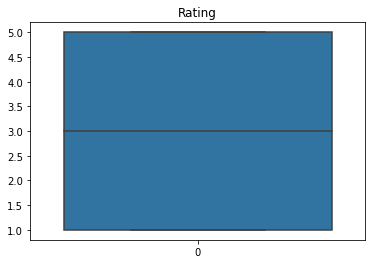

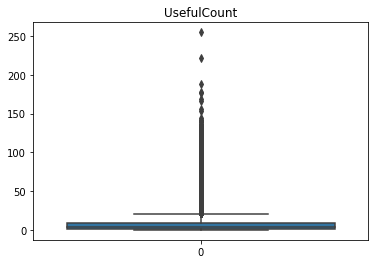

In [ ]:
## checking outliers
for i in ['Age','Rating','UsefulCount'] :
    plt.title(i)
    sns.boxplot(data=dc[i])
    plt.show()  

In [ ]:
df1=dc
df1.head()

,DrugId,Drug,Gender,Age,Condition,Race,Date,Rating,Side effect,UsefulCount
0,146724,25dph-7.5peh,M,41,Stuffy Nose,asian,9/21/2014,3,Mild Side Effects,0
1,146724,25dph-7.5peh,M,49,Cold Symptoms,asian,1/13/2011,1,Severe Side Effects,1
2,144731,warfarin (bulk) 100 % powder,M,37,Other,african american,7/16/2012,5,No Side Effects,0
3,144731,warfarin (bulk) 100 % powder,M,33,Other,american indian,9/23/2010,5,No Side Effects,0
4,144731,warfarin (bulk) 100 % powder,M,27,Other,native hawaiian,1/6/2009,3,Mild Side Effects,1


### Handling Outliers with Age

In [ ]:
q1 = np.percentile(df1['Age'],25,interpolation='midpoint')
q3 = np.percentile(df1['Age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['Age'][(df1['Age']<low_limit)|(df1['Age']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with Rating

In [ ]:
q1 = np.percentile(df1['Rating'],25,interpolation='midpoint')
q3 = np.percentile(df1['Rating'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['Rating'][(df1['Rating']<low_limit)|(df1['Rating']>high_limit)].index
df1.drop(index,inplace=True)


### Handling Outliers with UsefulCount

In [ ]:
q1 = np.percentile(df1['UsefulCount'],25,interpolation='midpoint')
q3 = np.percentile(df1['UsefulCount'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['UsefulCount'][(df1['UsefulCount']<low_limit)|(df1['Rating']>high_limit)].index
df1.drop(index,inplace=True)

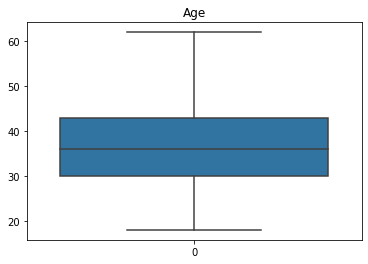

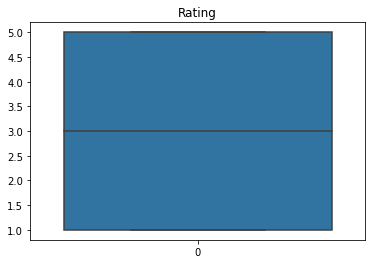

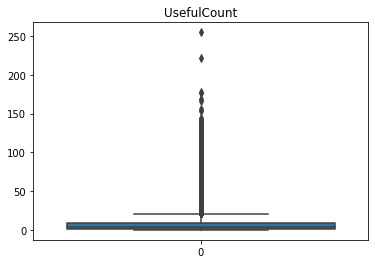

In [ ]:
## checking outliers
for i in ['Age','Rating','UsefulCount'] :
    plt.title(i)
    sns.boxplot(data=df1[i])
    plt.show() 

## 4. Exploratory Data analysis

The purpose of EDA is to find out interesting insights and irregularities in our Dataset. We will look at Each feature and try to find out interesting facts and patterns from them. And see whether there is any relationship between the variables or not.

### Check descriptive statistics - Numerical columns

In [ ]:
df1.describe()

,DrugId,Age,Rating,UsefulCount
count,359790.000000,359790.000000,359790.000000,359790.000000
mean,36916.874524,36.973535,2.673098,6.744843
std,52641.007244,9.224967,1.758070,9.320357
min,1.000000,18.000000,1.000000,0.000000
25%,4896.000000,30.000000,1.000000,1.000000
50%,9548.000000,36.000000,3.000000,4.000000
75%,63672.000000,43.000000,5.000000,9.000000
max,178546.000000,62.000000,5.000000,255.000000


### Check descriptive statistics - Categorical columns

In [ ]:
df1.describe(exclude='number')

,Drug,Gender,Condition,Race,Date,Side effect
count,359790,359790,359790,359790,359790,359790
unique,7059,2,1803,5,4524,3
top,cymbalta,F,Other,asian,10/29/2007,Severe Side Effects
freq,4609,197107,49339,95275,400,172332


Following things can be noticed from the description

Top drugName is Levonorgestrel, It will be intresting to see for what condition it is used.
Top condition is Birth Control.
Top review is just a single word "Good", but it has very small count - 39. May be lazy people like me have written that comment.
Most single day review came on 1-Mar-16, it will be interesting to investigate this date and see for which drugName and which conditions these reviews were for.

## 5. Feature Reduction

The column, DrugId is the numerical version of the drug name, so I chose to drop it. If I use the drug id it may lead to over or under-sampling of particular groups. 
Now, I need to convert the object date values to numeric for modeling, For that, I convert the object type date to the ‘DateTime’ type. After converting the datatype, I create another variable called ‘year’ from the date, Then I drop the date column from the dataset.



In [ ]:
df1.head()

,DrugId,Drug,Gender,Age,Condition,Race,Date,Rating,Side effect,UsefulCount
0,146724,25dph-7.5peh,M,41,Stuffy Nose,asian,9/21/2014,3,Mild Side Effects,0
1,146724,25dph-7.5peh,M,49,Cold Symptoms,asian,1/13/2011,1,Severe Side Effects,1
2,144731,warfarin (bulk) 100 % powder,M,37,Other,african american,7/16/2012,5,No Side Effects,0
3,144731,warfarin (bulk) 100 % powder,M,33,Other,american indian,9/23/2010,5,No Side Effects,0
4,144731,warfarin (bulk) 100 % powder,M,27,Other,native hawaiian,1/6/2009,3,Mild Side Effects,1


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1['Year']=df1['Date'].dt.year

In [ ]:
df1.drop('DrugId', axis = 1, inplace= True)

In [ ]:
df1.drop('Date', axis = 1, inplace= True)

### Heatmap for Correlation of the Features 

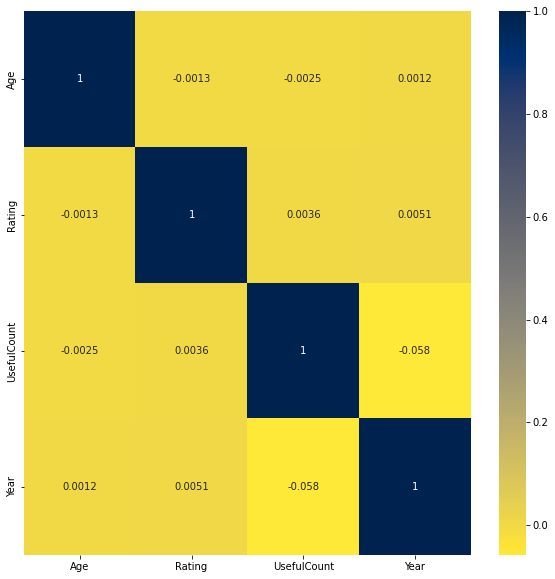

In [ ]:
#Heatmap for Correlation of the Features 
# This is a multi-variate heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, cmap='cividis_r')
plt.show()

## Feature Engineering

Created a new variable called ‘Review Sentiment’ from the rating column. The values of the column are 1 and 0, if the rating is less than 5 the review sentiment will be 0, if rating is greater than or equal to 5 the review sentiment will be 1.

In [ ]:
# feature engineering 
# let's make a new column named "review sentiment"

df1.loc[(df1['Rating'] >= 5), 'Review_Sentiment'] = 1
df1.loc[(df1['Rating'] < 5), 'Review_Sentiment'] = 0

df1['Review_Sentiment'].value_counts()

0.0    245383
1.0    114407
Name: Review_Sentiment, dtype: int64

In [ ]:
# NUMERIC FEATURES:

numeric_data = df1.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns 

print('Numeric Features: ')
print(numeric_data.head(5))
print('----'*20)

Numeric Features: 
   Age  Rating  UsefulCount  Year  Review_Sentiment
0   41       3            0  2014               0.0
1   49       1            1  2011               0.0
2   37       5            0  2012               1.0
3   33       5            0  2010               1.0
4   27       3            1  2009               0.0
--------------------------------------------------------------------------------


In [ ]:
# CATEGORICAL FEATURES:

df2 = df1.loc[:, ~df1.columns.isin(['Drug','Condition'])]

categorical_data = df2.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns

print('Categorical Features: ')
print(categorical_data.head(5))
print('----'*20)

Categorical Features: 
  Gender              Race          Side effect
0      M             asian    Mild Side Effects
1      M             asian  Severe Side Effects
2      M  african american      No Side Effects
3      M   american indian      No Side Effects
4      M   native hawaiian    Mild Side Effects
--------------------------------------------------------------------------------


## Data Visualization

### Univariate Analysis

### NUMERIC DATA:

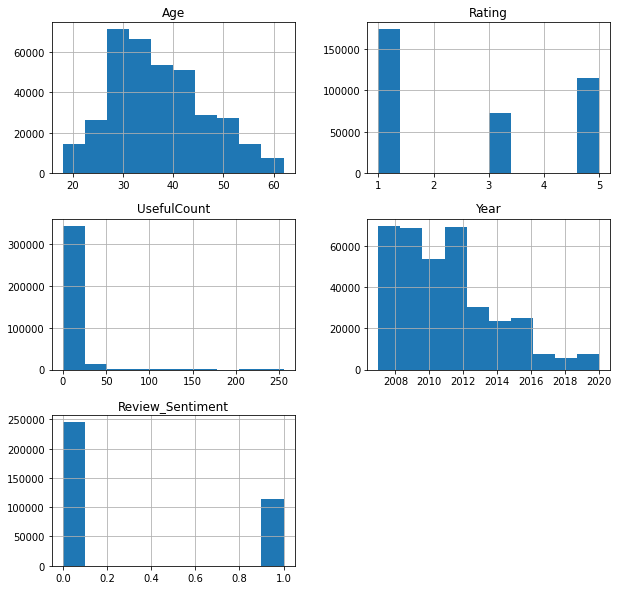

In [ ]:
# let's see how data is distributed for every column
df2.hist(figsize=(10,10), sharex=False);

**Findings**

1. The minimum age is 17 and the maximum is 70 years.
2. Highest range of patients lies between 25-55 age group.
3. The average age of patients is 37 years.
4. In rating more than 150000 patients give one as a treatment rating.
5. More than 100000 patients are satisfied with the treatment.
6. Most of the patient reviews came in 2008 and 2012 year



### CATEGORICAL DATA:

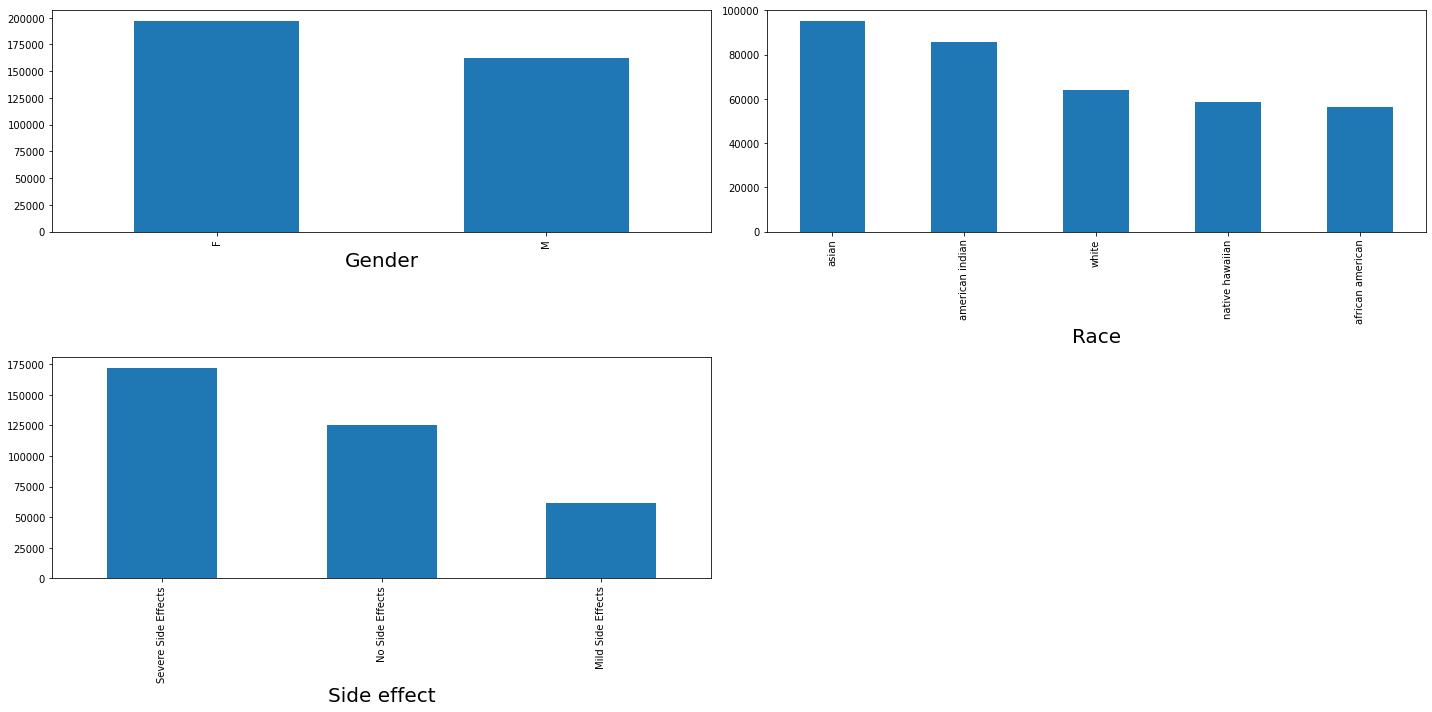

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,10), facecolor='white')
plotnumber = 1

for column in categorical_data:
    if plotnumber<=5 :
        ax = plt.subplot(2,2,plotnumber)
        categorical_data[column].value_counts().plot(kind='bar')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Findings**

1. If we look at the gender variable 40% of the patients are male and 60% is female.
2. Looking at the side effect, most of the patients have severe side effect.
Very less patients have mild side effect.
3. Looking at the patients race count we can see that most of the patients belongs to asian and american indian ethinicity.


## BI-VARIATE ANALYSIS:

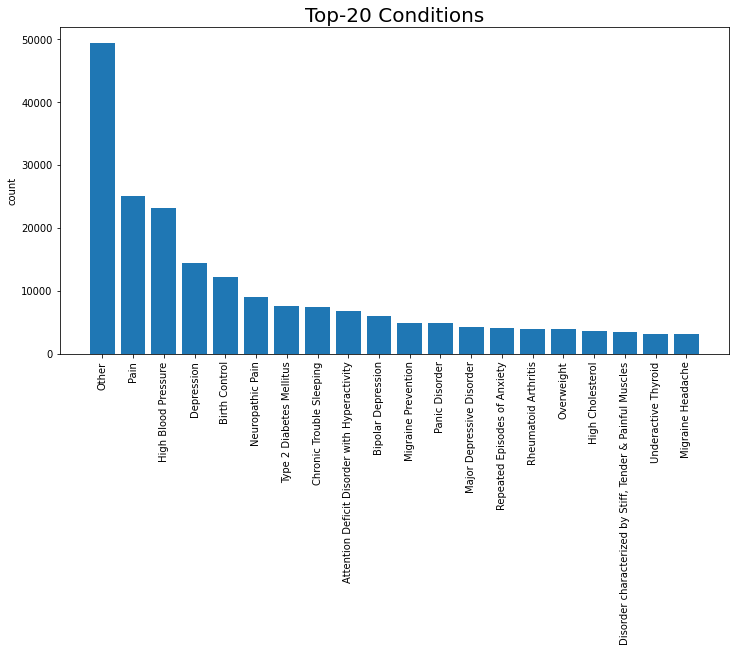

In [ ]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
Condition = df1['Condition'].value_counts(ascending = False).head(20)

plt.bar(Condition.index,Condition.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

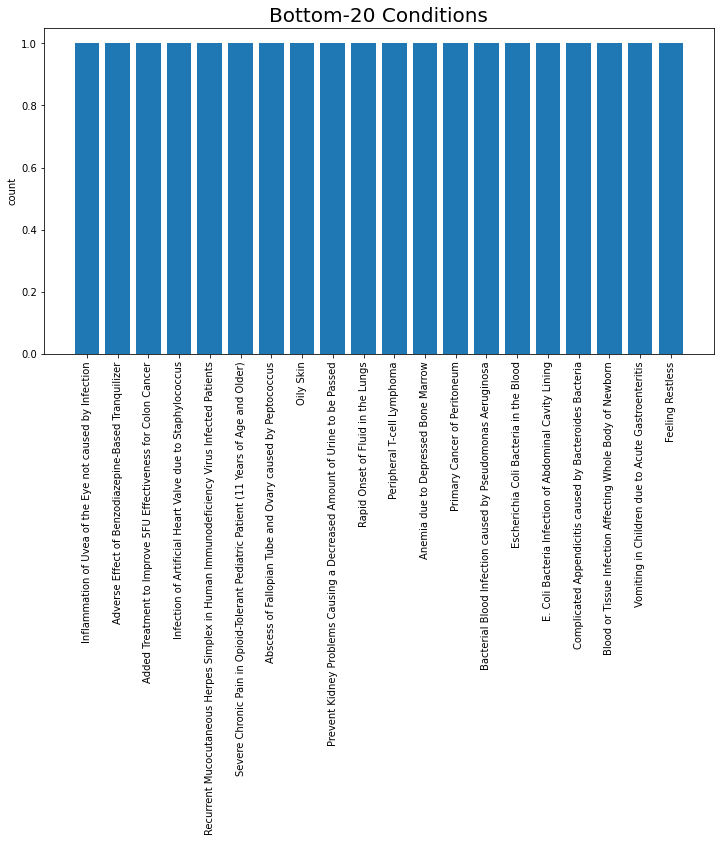

In [ ]:
#plot a bargraph to check bottom 20 conditions
plt.figure(figsize=(12,6))
conditions_bottom = df1['Condition'].value_counts(ascending = False).tail(20)

plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

Bottom 20 conditions have just single counts in our dataset. They may be the rare conditions.
And if we look at our plot we see that there are conditions whose name are strange starting with "61</span>users found this comment helpful" , these are the noise present in our data. We will deal with these noise later.

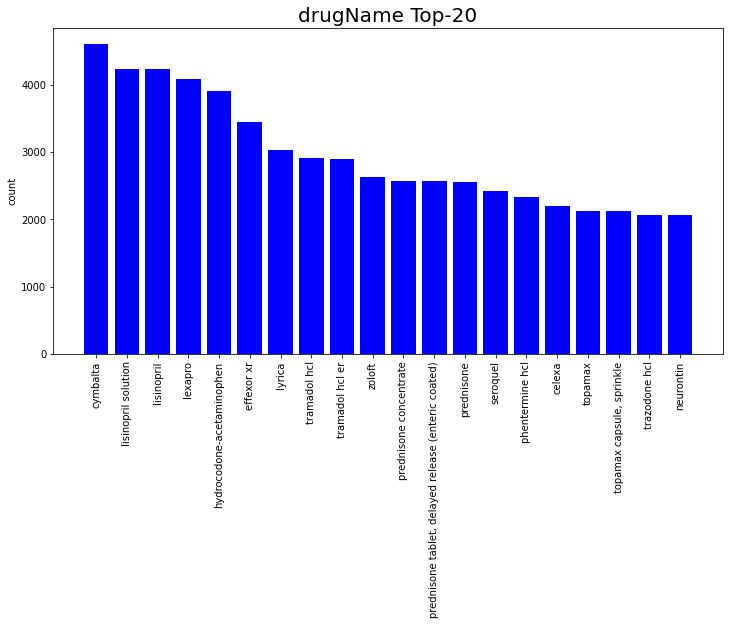

In [ ]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_top = df1['Drug'].value_counts(ascending = False).head(20)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

1. The top drugName is Levonorgestrel, which we had seen in description as well.
2. The top 3 drugName has count around 4000 and above.
3. Most of the drugName counts are around 1500 if we look at top 20

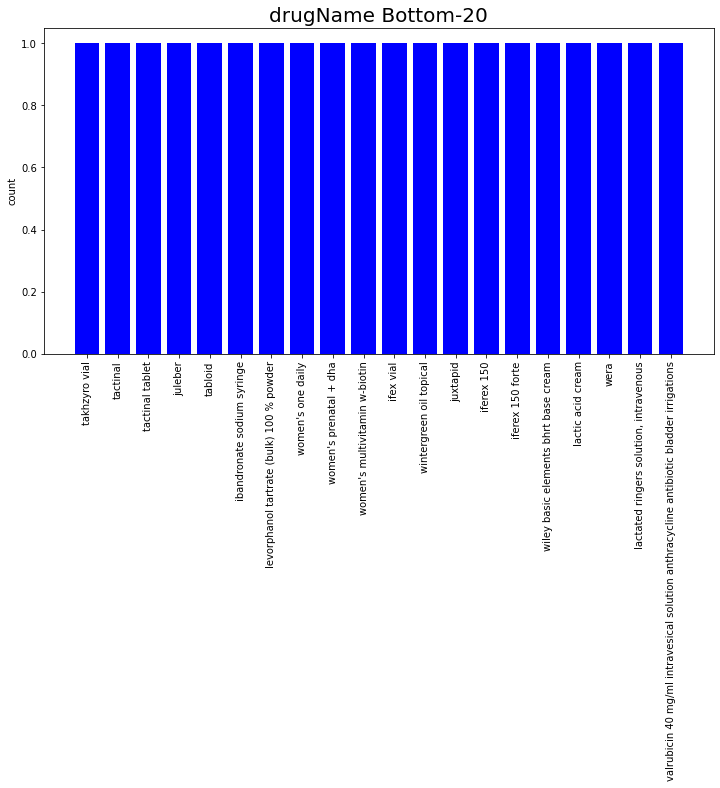

In [ ]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_bottom = df1['Drug'].value_counts(ascending = False).tail(20)

plt.bar(drugName_bottom.index,drugName_bottom.values,color='blue')
plt.title('drugName Bottom-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

The bottom 20 drugName has count 1. These might be the drugs used of rare conditions or are new in market.

### Check number of Drugs per condition

In [ ]:
#lets check the number of drugs/condition
df1.groupby('Condition')['Drug'].nunique().sort_values(ascending=False).head(20)

Condition
Other                                         4447
Osteoporosis                                   227
Birth Control                                  203
Pain                                           202
High Blood Pressure                            199
Acne                                           197
Painful Periods                                159
Rheumatoid Arthritis                           148
Cough                                          136
Cold Symptoms                                  129
Inflammation of the Nose due to an Allergy     122
Type 2 Diabetes Mellitus                       116
Abnormally Long or Heavy Periods               111
Incomplete or Infrequent Bowel Movements       108
Stuffy Nose                                    108
Disease of Ovaries with Cysts                  103
Allergic Conjunctivitis                        102
Migraine Headache                               95
"Change of Life" Signs                          92
AtopicSevere Side Eff

1. If we look above the top value is not listed/other.

2. It might be possible that the user didn't mentioned his/her condition as sometimes people doesn't want to reveal thier disorders. We can look up the drug names and fill up the conditions for which that drug is used.



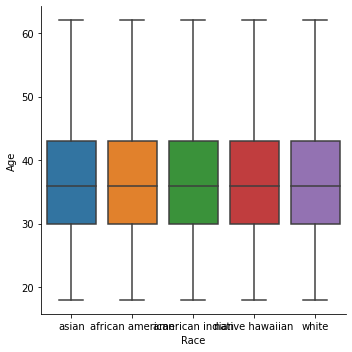

In [ ]:
# Plotting Race vs age
sns.catplot(x="Race", y= "Age", kind="box", data=df2)

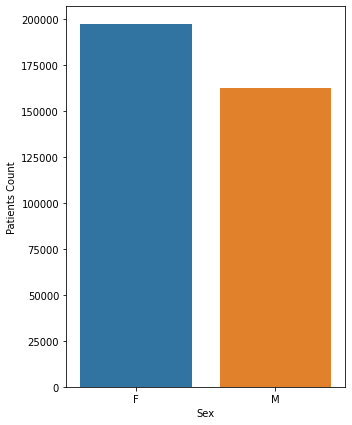

In [ ]:
d1 = df2.Gender.value_counts().sort_index()
plt.figure(figsize=(5,7))
sns.barplot(d1.index, d1.values)
plt.xlabel('Sex')
plt.ylabel('Patients Count')
plt.show()

In [ ]:
df1.Gender.value_counts()

F    197107
M    162683
Name: Gender, dtype: int64

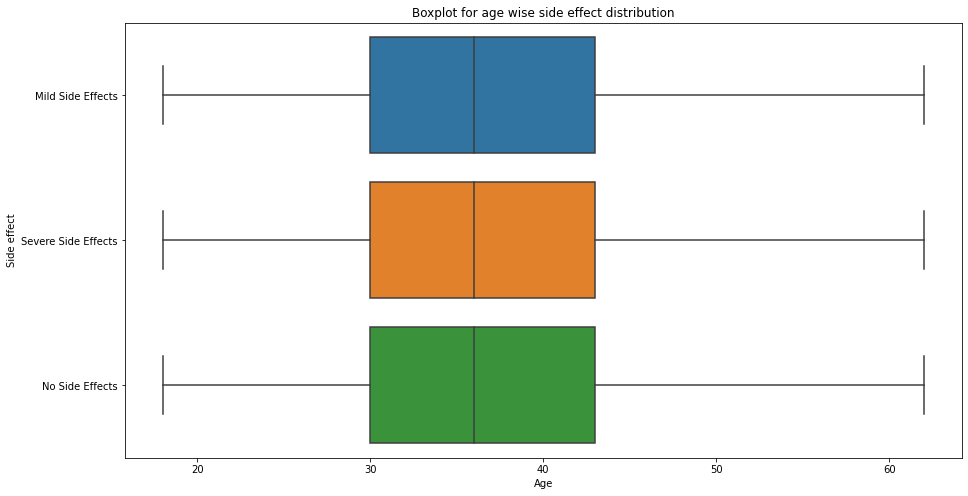

In [ ]:
plt.figure(figsize=(15,8))

sns.boxplot(x='Age', y='Side effect', data=df1)
plt.title('Boxplot for age wise side effect distribution')
plt.show()

<Figure size 1080x576 with 0 Axes>

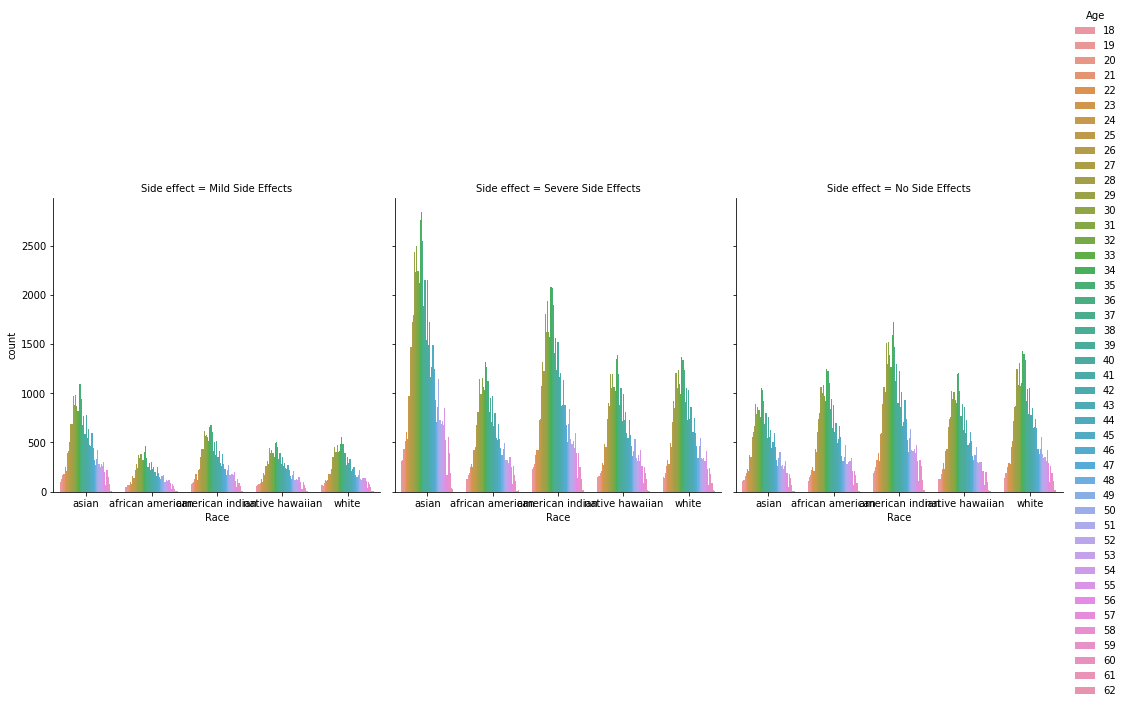

In [ ]:
plt.figure(figsize=(15,8))
sns.catplot(x ='Race', hue ='Age', 
            kind ='count', col ='Side effect', data = df1)
plt.show()

1.	In this graph we can see that in the ‘Mild side effect’ case most of the patients are Asians, and they belong to the 30 – 46 age group.
2.	In ‘Severe side effects most of the patients are Asians and American Indians,
and they also belong to the 30 – 46 age group. Most of the patients have severe side effects.
3.	In ‘No side effect’ most of the patients are American Indian and white.
 


Text(0, 0.5, 'Patients Count')

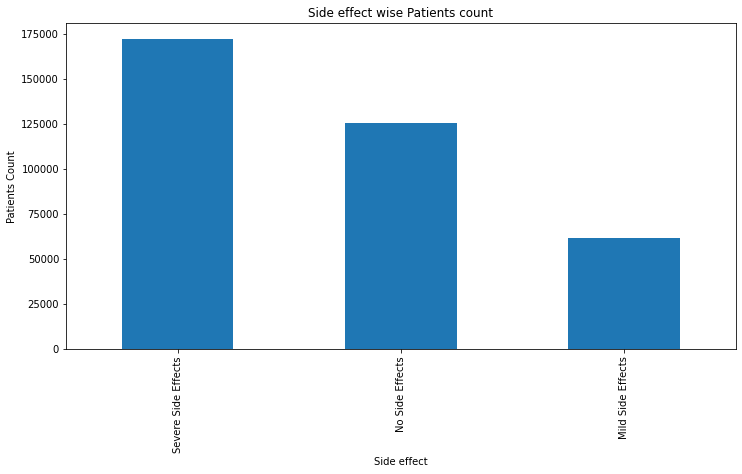

In [ ]:
# plot depicting Sales Price wrt Boroughs
plt.figure(figsize=(12,6))
df1['Side effect'].value_counts().plot.bar()
plt.title("Side effect wise Patients count")
plt.xlabel('Side effect')
plt.ylabel('Patients Count')

Text(0, 0.5, 'Patients Count')

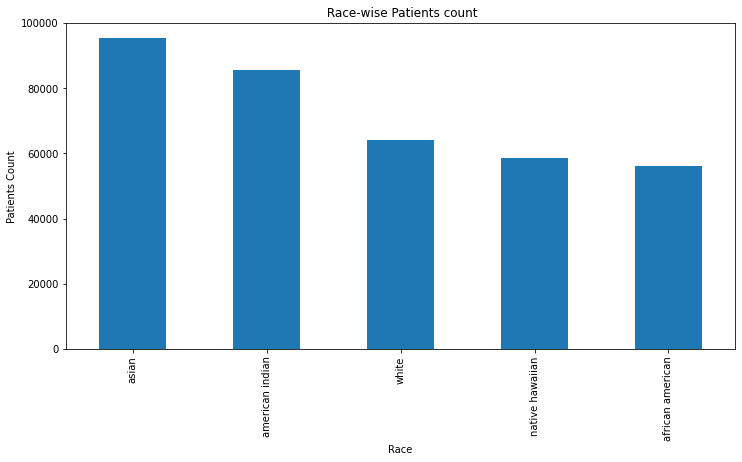

In [ ]:

plt.figure(figsize=(12,6))
df1['Race'].value_counts().plot.bar()
plt.title(" Race-wise Patients count")
plt.xlabel('Race')
plt.ylabel('Patients Count')

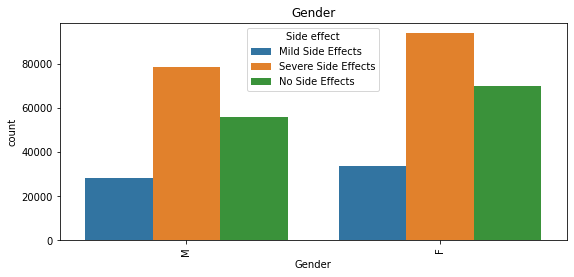

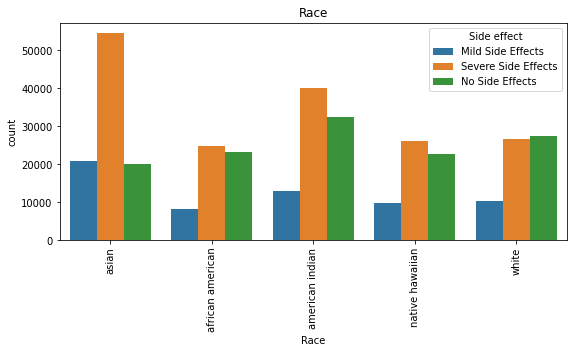

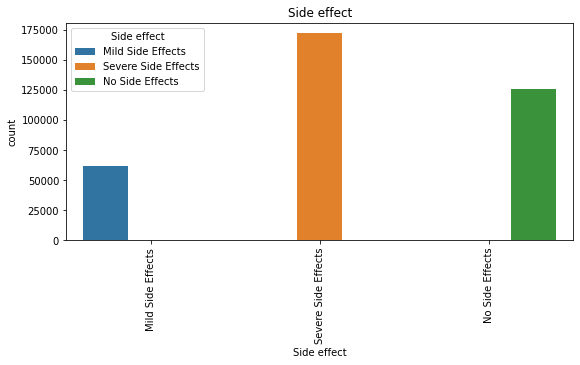

In [ ]:
for column in categorical_data:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=categorical_data[column],hue=categorical_data['Side effect'],data=categorical_data)
    plt.title(column)    
    plt.xticks(rotation=90)

1.	More than 175000 patients have severe side effects.
2.	In gender-wise also, male and female patients have a high rate of ‘severe side effects.
3.	They both have less rate of ‘mild side effects.
4.	More than 80000 female patients have ‘severe side effects.
5.	In race – wise, we can see that  more than 50,000 Asian patients have severe side effects, 
More than 20,000 Asian patients have mild side effects, and the rate of ‘no side effects’ patients is very less in Asians when compared to another ethnicity.
6.	The lowest number of patients are African Americans.
7.	In all ethnicity patients have hia gh rate of  ‘severe side effects, but white patients have more ‘no side effect’ cases.


In [ ]:
popn = df.value_counts('Drug',ascending=False).head(10)

In [ ]:
popn

Drug
cymbalta                     4648
lisinopril solution          4269
lisinopril                   4269
lexapro                      4134
hydrocodone-acetaminophen    3944
effexor xr                   3486
lyrica                       3069
tramadol hcl er              2932
tramadol hcl                 2932
zoloft                       2662
dtype: int64

## 9. Encoding

In [ ]:
data = df1

In [ ]:
data.columns

Index(['Drug', 'Gender', 'Age', 'Condition', 'Race', 'Rating', 'Side effect',
       'UsefulCount', 'Year', 'Review_Sentiment'],
      dtype='object')

In [ ]:
unique_checker(data)

Unique values in Drug feature.
['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest congestion relief dm' 'chantix' 'chateal'] 

****************************************
Unique values in Gender feature.
['M' 'F'] 

****************************************
Unique values in Age feature.
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60 61 62] 

****************************************
Unique values in Condition feature.
['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance'] 

****************************************
Unique values in Race feature.
['asian' 'african american' 'american indian' 'native hawaiian' 'white'] 

****************************************
Unique values in Rating feature.
[3 1 5] 

****************************************
Unique values in Side effect feature.
['Mild Side Effects' 'Se

## One-Hot Encoding

In [ ]:
#Select the variables to be one-hot encoded
one_hot_features = ['Gender','Review_Sentiment']

data = pd.get_dummies(data, columns=one_hot_features)

In [ ]:
data.head()

,Drug,Age,Condition,Race,Rating,Side effect,UsefulCount,Year,Gender_F,Gender_M,Review_Sentiment_0.0,Review_Sentiment_1.0
0,25dph-7.5peh,41,Stuffy Nose,asian,3,Mild Side Effects,0,2014,0,1,1,0
1,25dph-7.5peh,49,Cold Symptoms,asian,1,Severe Side Effects,1,2011,0,1,1,0
2,warfarin (bulk) 100 % powder,37,Other,african american,5,No Side Effects,0,2012,0,1,0,1
3,warfarin (bulk) 100 % powder,33,Other,american indian,5,No Side Effects,0,2010,0,1,0,1
4,warfarin (bulk) 100 % powder,27,Other,native hawaiian,3,Mild Side Effects,1,2009,0,1,1,0


## Label Encoding

In [ ]:
#label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric 
data['Drug']  = le.fit_transform(data['Drug'])
data['Race']  = le.fit_transform(data['Race'])
data['Condition']  = le.fit_transform(data['Condition'])

In [ ]:
data.head()

,Drug,Age,Condition,Race,Rating,Side effect,UsefulCount,Year,Gender_F,Gender_M,Review_Sentiment_0.0,Review_Sentiment_1.0
0,4,41,1594,2,3,Mild Side Effects,0,2014,0,1,1,0
1,4,49,423,2,1,Severe Side Effects,1,2011,0,1,1,0
2,6832,37,1181,0,5,No Side Effects,0,2012,0,1,0,1
3,6832,33,1181,1,5,No Side Effects,0,2010,0,1,0,1
4,6832,27,1181,3,3,Mild Side Effects,1,2009,0,1,1,0


# Model Development & Classification

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop('Side effect', axis = 1)
y = data['Side effect']
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size =0.3,random_state=2)

## Standard scaling

In [ ]:
x = data.drop('Side effect', axis = 1)

In [ ]:
x.describe()

,Drug,Age,Condition,Race,Rating,UsefulCount,Year,Gender_F,Gender_M,Review_Sentiment_0.0,Review_Sentiment_1.0
count,359790.000000,359790.000000,359790.000000,359790.000000,359790.000000,359790.000000,359790.000000,359790.000000,359790.000000,359790.000000,359790.000000
mean,3681.421513,36.973535,889.070463,1.969018,2.673098,6.744843,2011.008541,0.547839,0.452161,0.682017,0.317983
std,1997.040458,9.224967,466.625256,1.318316,1.758070,9.320357,2.889760,0.497707,0.497707,0.465693,0.465693
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,2007.000000,0.000000,0.000000,0.000000,0.000000
25%,1943.000000,30.000000,490.000000,1.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000
50%,3785.000000,36.000000,1060.000000,2.000000,3.000000,4.000000,2010.000000,1.000000,0.000000,1.000000,0.000000
75%,5214.000000,43.000000,1199.000000,3.000000,5.000000,9.000000,2013.000000,1.000000,1.000000,1.000000,1.000000
max,7058.000000,62.000000,1802.000000,4.000000,5.000000,255.000000,2020.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,359790.000000,3.597900e+05,3.597900e+05,3.597900e+05,3.597900e+05,3.597900e+05,3.597900e+05,3.597900e+05,3.597900e+05,3.597900e+05,3.597900e+05
mean,0.000000,-7.871879e-17,-9.605825e-17,2.121023e-17,-1.093295e-16,-2.543648e-17,-3.868809e-14,-3.690659e-16,3.690659e-16,6.319622e-18,-6.319622e-18
std,1.000001,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.843441,-2.056762e+00,-1.905323e+00,-1.493588e+00,-9.516690e-01,-7.236689e-01,-1.387156e+00,-1.100728e+00,-9.084898e-01,-1.464522e+00,-6.828166e-01
25%,-0.870500,-7.559425e-01,-8.552281e-01,-7.350434e-01,-9.516690e-01,-6.163767e-01,-6.950556e-01,-1.100728e+00,-9.084898e-01,-1.464522e+00,-6.828166e-01
50%,0.051866,-1.055327e-01,3.663106e-01,2.350120e-02,1.859439e-01,-2.945002e-01,-3.490056e-01,9.084898e-01,-9.084898e-01,6.828166e-01,-6.828166e-01
75%,0.767426,6.532786e-01,6.641946e-01,7.820458e-01,1.323557e+00,2.419607e-01,6.891443e-01,9.084898e-01,1.100728e+00,6.828166e-01,1.464522e+00
max,1.690794,2.712909e+00,1.956454e+00,1.540590e+00,1.323557e+00,2.663584e+01,3.111494e+00,9.084898e-01,1.100728e+00,6.828166e-01,1.464522e+00


## Logistic Regression Model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,logit_model.predict(x_test)),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,logit_model.predict(x_test),average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,logit_model.predict(x_test),average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,logit_model.predict(x_test),average='macro'),4))

Accuracy for Logistic Regression is 0.9489
Precision for Logistic Regression is 0.9257
Recall for Logistic Regression is 0.9339
F1-Score for Logistic Regression is 0.9293


In [ ]:
print(classification_report(y_test,logit_model.predict(x_test)))

                     precision    recall  f1-score   support

  Mild Side Effects       0.83      0.89      0.86     18378
    No Side Effects       0.97      0.93      0.95     37779
Severe Side Effects       0.98      0.98      0.98     51780

           accuracy                           0.95    107937
          macro avg       0.93      0.93      0.93    107937
       weighted avg       0.95      0.95      0.95    107937



Text(33.0, 0.5, 'Actual Labels')

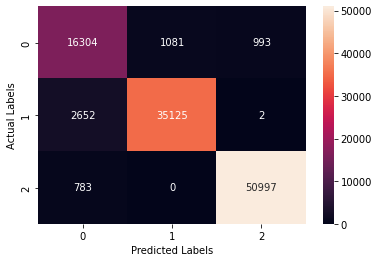

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [ ]:
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [ ]:
print('Accuracy on training data is:',dt_model.score(x_train,y_train))

Accuracy on training data is: 0.9996466192580593


In [ ]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9633582552785421
Precision is: 0.9634922405833605
Recall is: 0.9633582552785421
f1 score is: 0.9634217262300938


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                     precision    recall  f1-score   support

  Mild Side Effects       0.89      0.90      0.89     18378
    No Side Effects       0.97      0.97      0.97     37779
Severe Side Effects       0.98      0.98      0.98     51780

           accuracy                           0.96    107937
          macro avg       0.95      0.95      0.95    107937
       weighted avg       0.96      0.96      0.96    107937

[[16479  1025   874]
 [ 1054 36725     0]
 [ 1002     0 50778]]


## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

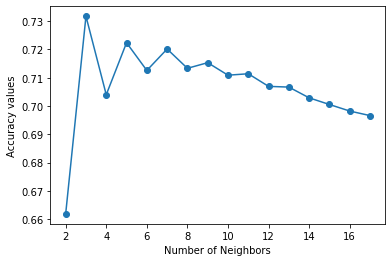

In [ ]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [ ]:
print('Accuracy on training data is:',knn_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy on training data is: 0.805696179914474
Accuracy is: 0.7201700992245477
Precision is: 0.6988970102226914
Recall is: 0.7201700992245477
f1 score is: 0.7046243888875536


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                     precision    recall  f1-score   support

  Mild Side Effects       0.43      0.26      0.33     18378
    No Side Effects       0.76      0.77      0.77     37779
Severe Side Effects       0.75      0.84      0.79     51780

           accuracy                           0.72    107937
          macro avg       0.65      0.63      0.63    107937
       weighted avg       0.70      0.72      0.70    107937

[[ 4817  4336  9225]
 [ 3072 29267  5440]
 [ 3260  4871 43649]]


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [ ]:
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [ ]:
print('Accuracy on training data is:',rf_model.score(x_train,y_train))

Accuracy on training data is: 0.9996466192580593


In [ ]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9696489618944384
Precision is: 0.9692582005032014
Recall is: 0.9696489618944384
f1 score is: 0.9692252678927752


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                     precision    recall  f1-score   support

  Mild Side Effects       0.94      0.88      0.91     18378
    No Side Effects       0.97      0.98      0.98     37779
Severe Side Effects       0.98      0.99      0.99     51780

           accuracy                           0.97    107937
          macro avg       0.96      0.95      0.96    107937
       weighted avg       0.97      0.97      0.97    107937

[[16119  1167  1092]
 [  576 37203     0]
 [  441     0 51339]]


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [ ]:
print('Accuracy on training data is:',rf_model.score(x_train,y_train))

Accuracy on training data is: 0.9996466192580593


In [ ]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9726692422431603
Precision is: 0.972866317102295
Recall is: 0.9726692422431603
f1 score is: 0.9719344578076845


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                     precision    recall  f1-score   support

  Mild Side Effects       0.98      0.86      0.91     18378
    No Side Effects       0.97      0.99      0.98     37779
Severe Side Effects       0.98      1.00      0.99     51780

           accuracy                           0.97    107937
          macro avg       0.97      0.95      0.96    107937
       weighted avg       0.97      0.97      0.97    107937

[[15751  1359  1268]
 [  230 37549     0]
 [   93     0 51687]]


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
gnb = model.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

In [ ]:
print('Accuracy on training data is:',rf_model.score(x_train,y_train))

Accuracy on training data is: 0.9996466192580593


In [ ]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9525371281395629
Precision is: 0.9581908733309277
Recall is: 0.9525371281395629
f1 score is: 0.9537063814145298


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                     precision    recall  f1-score   support

  Mild Side Effects       0.81      0.95      0.87     18378
    No Side Effects       1.00      0.91      0.95     37779
Severe Side Effects       0.98      0.98      0.98     51780

           accuracy                           0.95    107937
          macro avg       0.93      0.95      0.94    107937
       weighted avg       0.96      0.95      0.95    107937

[[17394     0   984]
 [ 3356 34423     0]
 [  783     0 50997]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9722893910336585

**As seen in the graph, there is a class imbalance problem. Models do not fit well when there is a class imbalance. There are some methods like oversampling, undersampling and mixture. I will do class oversampling using SMOTE(Synthetic Minority Oversampling Technique). It creates new samples along the lines of the existing samples.**

## Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)
counter=Counter(y)
print(counter)

Counter({'Mild Side Effects': 172332, 'Severe Side Effects': 172332, 'No Side Effects': 172332})


<BarContainer object of 3 artists>

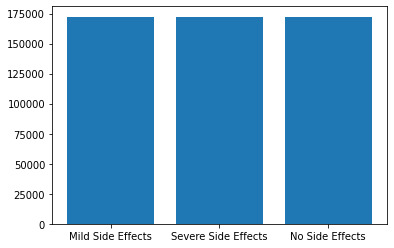

In [ ]:
plt.bar(counter.keys(),counter.values())

In [ ]:
#Standardisation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=24) # 80% training and 20% test

## Logistic Regression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
logmodel.score(X_test,Y_test)

0.9415570599613153

## Decision Tree Classifier

In [ ]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)
print('Accuracy on training data is:',dt_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9997267865259819
Accuracy is: 0.9634912959381045
Precision is: 0.963511713681237
Recall is: 0.9634912959381045
f1 score is: 0.9635009617285788
                     precision    recall  f1-score   support

  Mild Side Effects       0.94      0.95      0.95     34573
    No Side Effects       0.97      0.97      0.97     34338
Severe Side Effects       0.98      0.98      0.98     34489

           accuracy                           0.96    103400
          macro avg       0.96      0.96      0.96    103400
       weighted avg       0.96      0.96      0.96    103400

[[32718  1079   776]
 [ 1082 33256     0]
 [  838     0 33651]]


## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(X_train,Y_train)
  Y_pred=knn_model.predict(X_test)
  acc=accuracy_score(Y_test,Y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

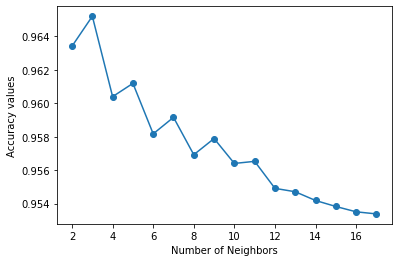

In [ ]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
print('Accuracy on training data is:',knn_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9827488660431919
Accuracy is: 0.9652030947775628
Precision is: 0.9658642073241295
Recall is: 0.9652030947775628
f1 score is: 0.9653596320090861
                     precision    recall  f1-score   support

  Mild Side Effects       0.93      0.97      0.95     34573
    No Side Effects       0.98      0.97      0.98     34338
Severe Side Effects       0.98      0.96      0.97     34489

           accuracy                           0.97    103400
          macro avg       0.97      0.97      0.97    103400
       weighted avg       0.97      0.97      0.97    103400

[[33437   528   608]
 [ 1123 33214     1]
 [ 1338     0 33151]]


## Random Forest Classifier

In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9997267865259819
Accuracy is: 0.9743520309477757
Precision is: 0.9743355940548396
Recall is: 0.9743520309477757
f1 score is: 0.9743367437425577
                     precision    recall  f1-score   support

  Mild Side Effects       0.96      0.96      0.96     34573
    No Side Effects       0.98      0.98      0.98     34338
Severe Side Effects       0.98      0.99      0.98     34489

           accuracy                           0.97    103400
          macro avg       0.97      0.97      0.97    103400
       weighted avg       0.97      0.97      0.97    103400

[[33188   664   721]
 [  808 33530     0]
 [  459     0 34030]]


## GradientBoosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9997267865259819
Accuracy is: 0.9606866537717601
Precision is: 0.9606386351570231
Recall is: 0.9606866537717601
f1 score is: 0.9605586653521676
                     precision    recall  f1-score   support

  Mild Side Effects       0.95      0.93      0.94     34573
    No Side Effects       0.97      0.96      0.97     34338
Severe Side Effects       0.96      0.99      0.97     34489

           accuracy                           0.96    103400
          macro avg       0.96      0.96      0.96    103400
       weighted avg       0.96      0.96      0.96    103400

[[32176  1008  1389]
 [ 1260 33078     0]
 [  408     0 34081]]


## Model prediction Accuracy table

In [ ]:
from tabulate import tabulate

In [ ]:
table = [['Model', 'Accuracy'], ['Logistic Regression',94.08], ['KNN',96.50],['Decision tree',96.30],['Random Forest',97.47],['Gradient Boost',96.06]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      94.08 │
├─────────────────────┼────────────┤
│ KNN                 │      96.5  │
├─────────────────────┼────────────┤
│ Decision tree       │      96.3  │
├─────────────────────┼────────────┤
│ Random Forest       │      97.47 │
├─────────────────────┼────────────┤
│ Gradient Boost      │      96.06 │
╘═════════════════════╧════════════╛


## HyperParameter Tuning

## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid

param_grid = {'C': [1,10,100,1000]}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, Y_train)
logreg_cv.predict(X_test)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.9405023249869995


## FineTuning of the Model Random Forest

### Feature Importance

In [ ]:
pd.Series(rf_model.feature_importances_,index=x.columns).sort_values(ascending=False)*100

4     49.674085
9     18.495738
10    16.707424
0      6.210445
5      2.353732
1      2.088733
2      1.822738
6      1.502512
3      0.736642
7      0.221646
8      0.186305
dtype: float64

**0.Drug,	1.Age , 2.Condition,	3.Race,	4.Rating,		5.UsefulCount,	6.Year,	7.Gender_F,	8.Gender_M,	9.Review_Sentiment_0.0,	10.Review_Sentiment_1.0**

### Fine tuning of Hyperparameters

### Grid Search CV

In [ ]:
param_grid = { 
    'n_estimators': [100,200,300],
    'max_depth' : [20,25,30],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 300}

In [ ]:
rft = RandomForestClassifier(n_estimators=300,max_depth=25,random_state=42,criterion='entropy')
rft.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=300,
                       random_state=42)

In [ ]:
y_pred=rft.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9741199226305609

In [ ]:
print(classification_report(Y_test, y_pred))

                     precision    recall  f1-score   support

  Mild Side Effects       0.97      0.96      0.96     34573
    No Side Effects       0.98      0.98      0.98     34338
Severe Side Effects       0.98      0.99      0.98     34489

           accuracy                           0.97    103400
          macro avg       0.97      0.97      0.97    103400
       weighted avg       0.97      0.97      0.97    103400



##Model prediction Accuracy table after tuning

In [ ]:
table = [['Model', 'Accuracy'], ['Logistic Regression',94.00],['Random Forest',97.41]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      94    │
├─────────────────────┼────────────┤
│ Random Forest       │      97.41 │
╘═════════════════════╧════════════╛


**It can be inferred from the table summary that Random Forest model gives best accuracy of 97.41 % while model training.**

**So that we finalized our ML model for predicting the side effects using Random Forest Algorithm.**